# Multiple Linear Regression

## Assignment Task:

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

### Dataset Description:

The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax: 
Price: Offer Price in EUROs

## Tasks:

### 1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [173]:
import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [174]:
import pandas as pd

In [175]:
df = pd.read_csv('./ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


#### EDA:

In [176]:
# Checking for Null Values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [177]:
# Checking for Duplicated Columns
df.duplicated().sum()

1

In [178]:
# Checking for Data Types
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [179]:
# Descriptive Analysis
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [180]:
# Converting Categorical Column to Numerical Column
dt = pd.get_dummies(df['Fuel_Type'], dtype='int64')

# Adding new Numberical Column to the Original Dataframe
df = pd.concat([df, dt], axis=1)

# Droping Fuel_Type Column, since it has been converted to Numerical Column
df.drop(columns=['Fuel_Type'], inplace=True)


display(df)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,CNG,Diesel,Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

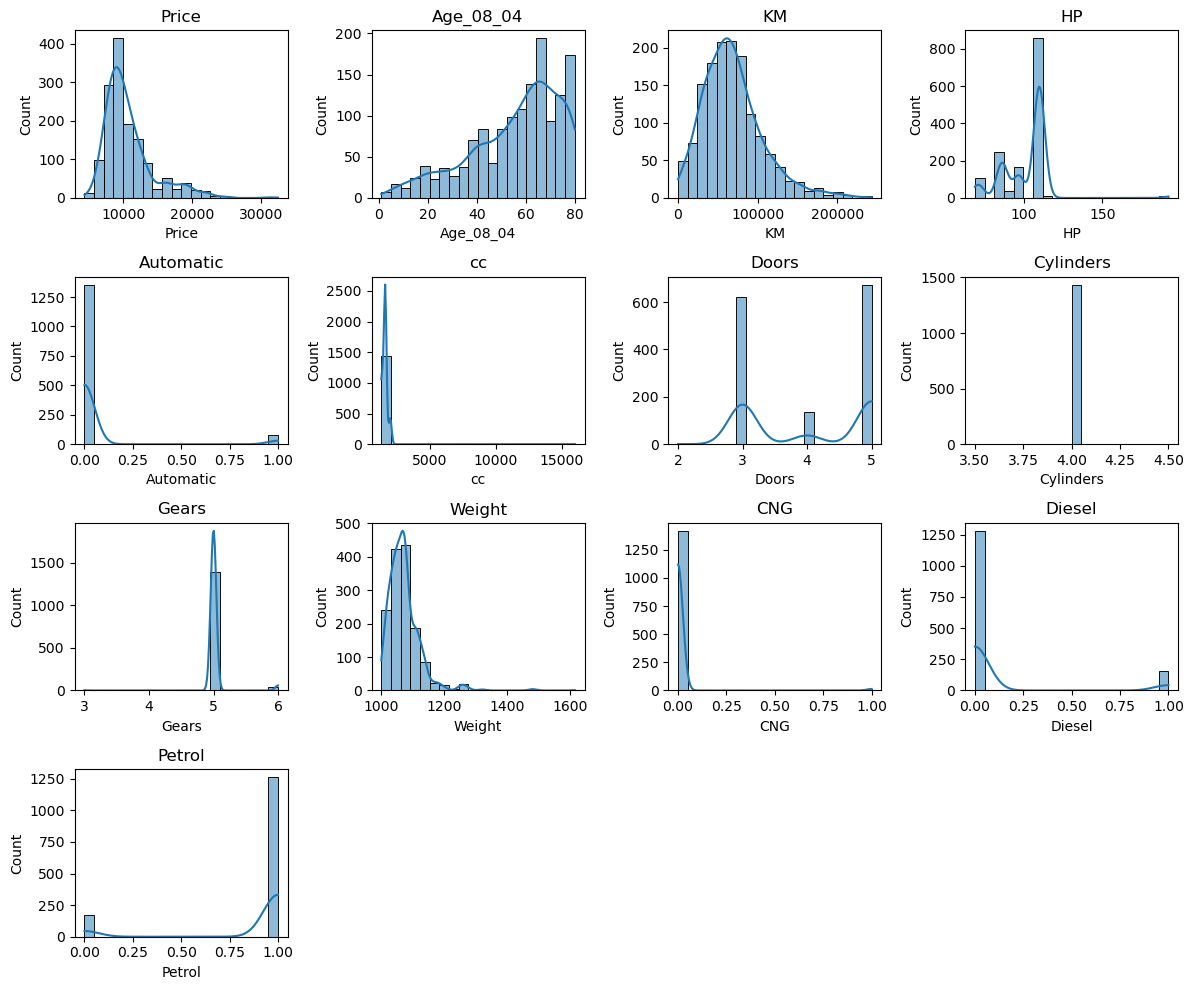

In [182]:
# Checking for the type of Distribution of Variables:

plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

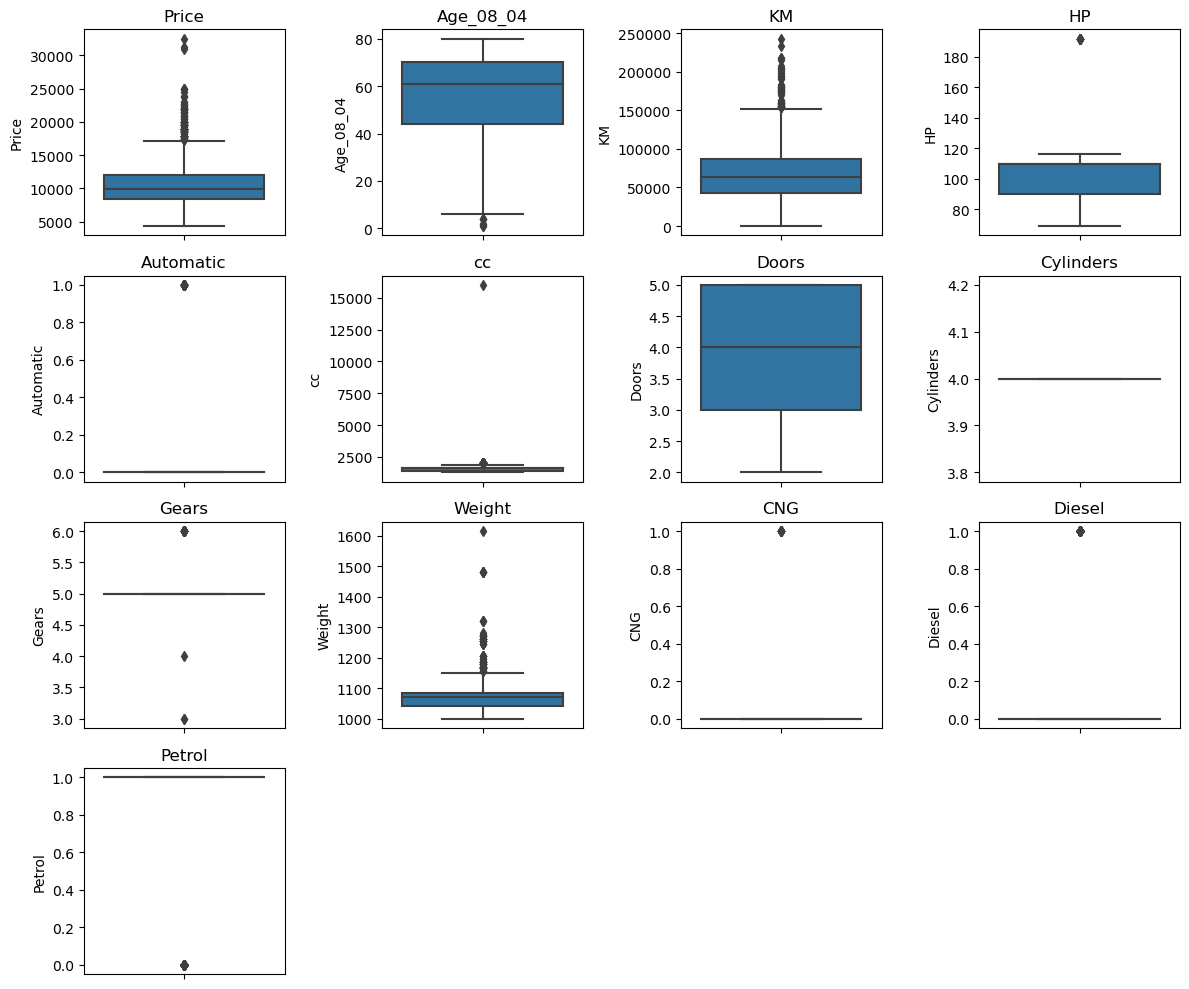

In [183]:
# Checking for Outliers:

plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Checking for Correlation:

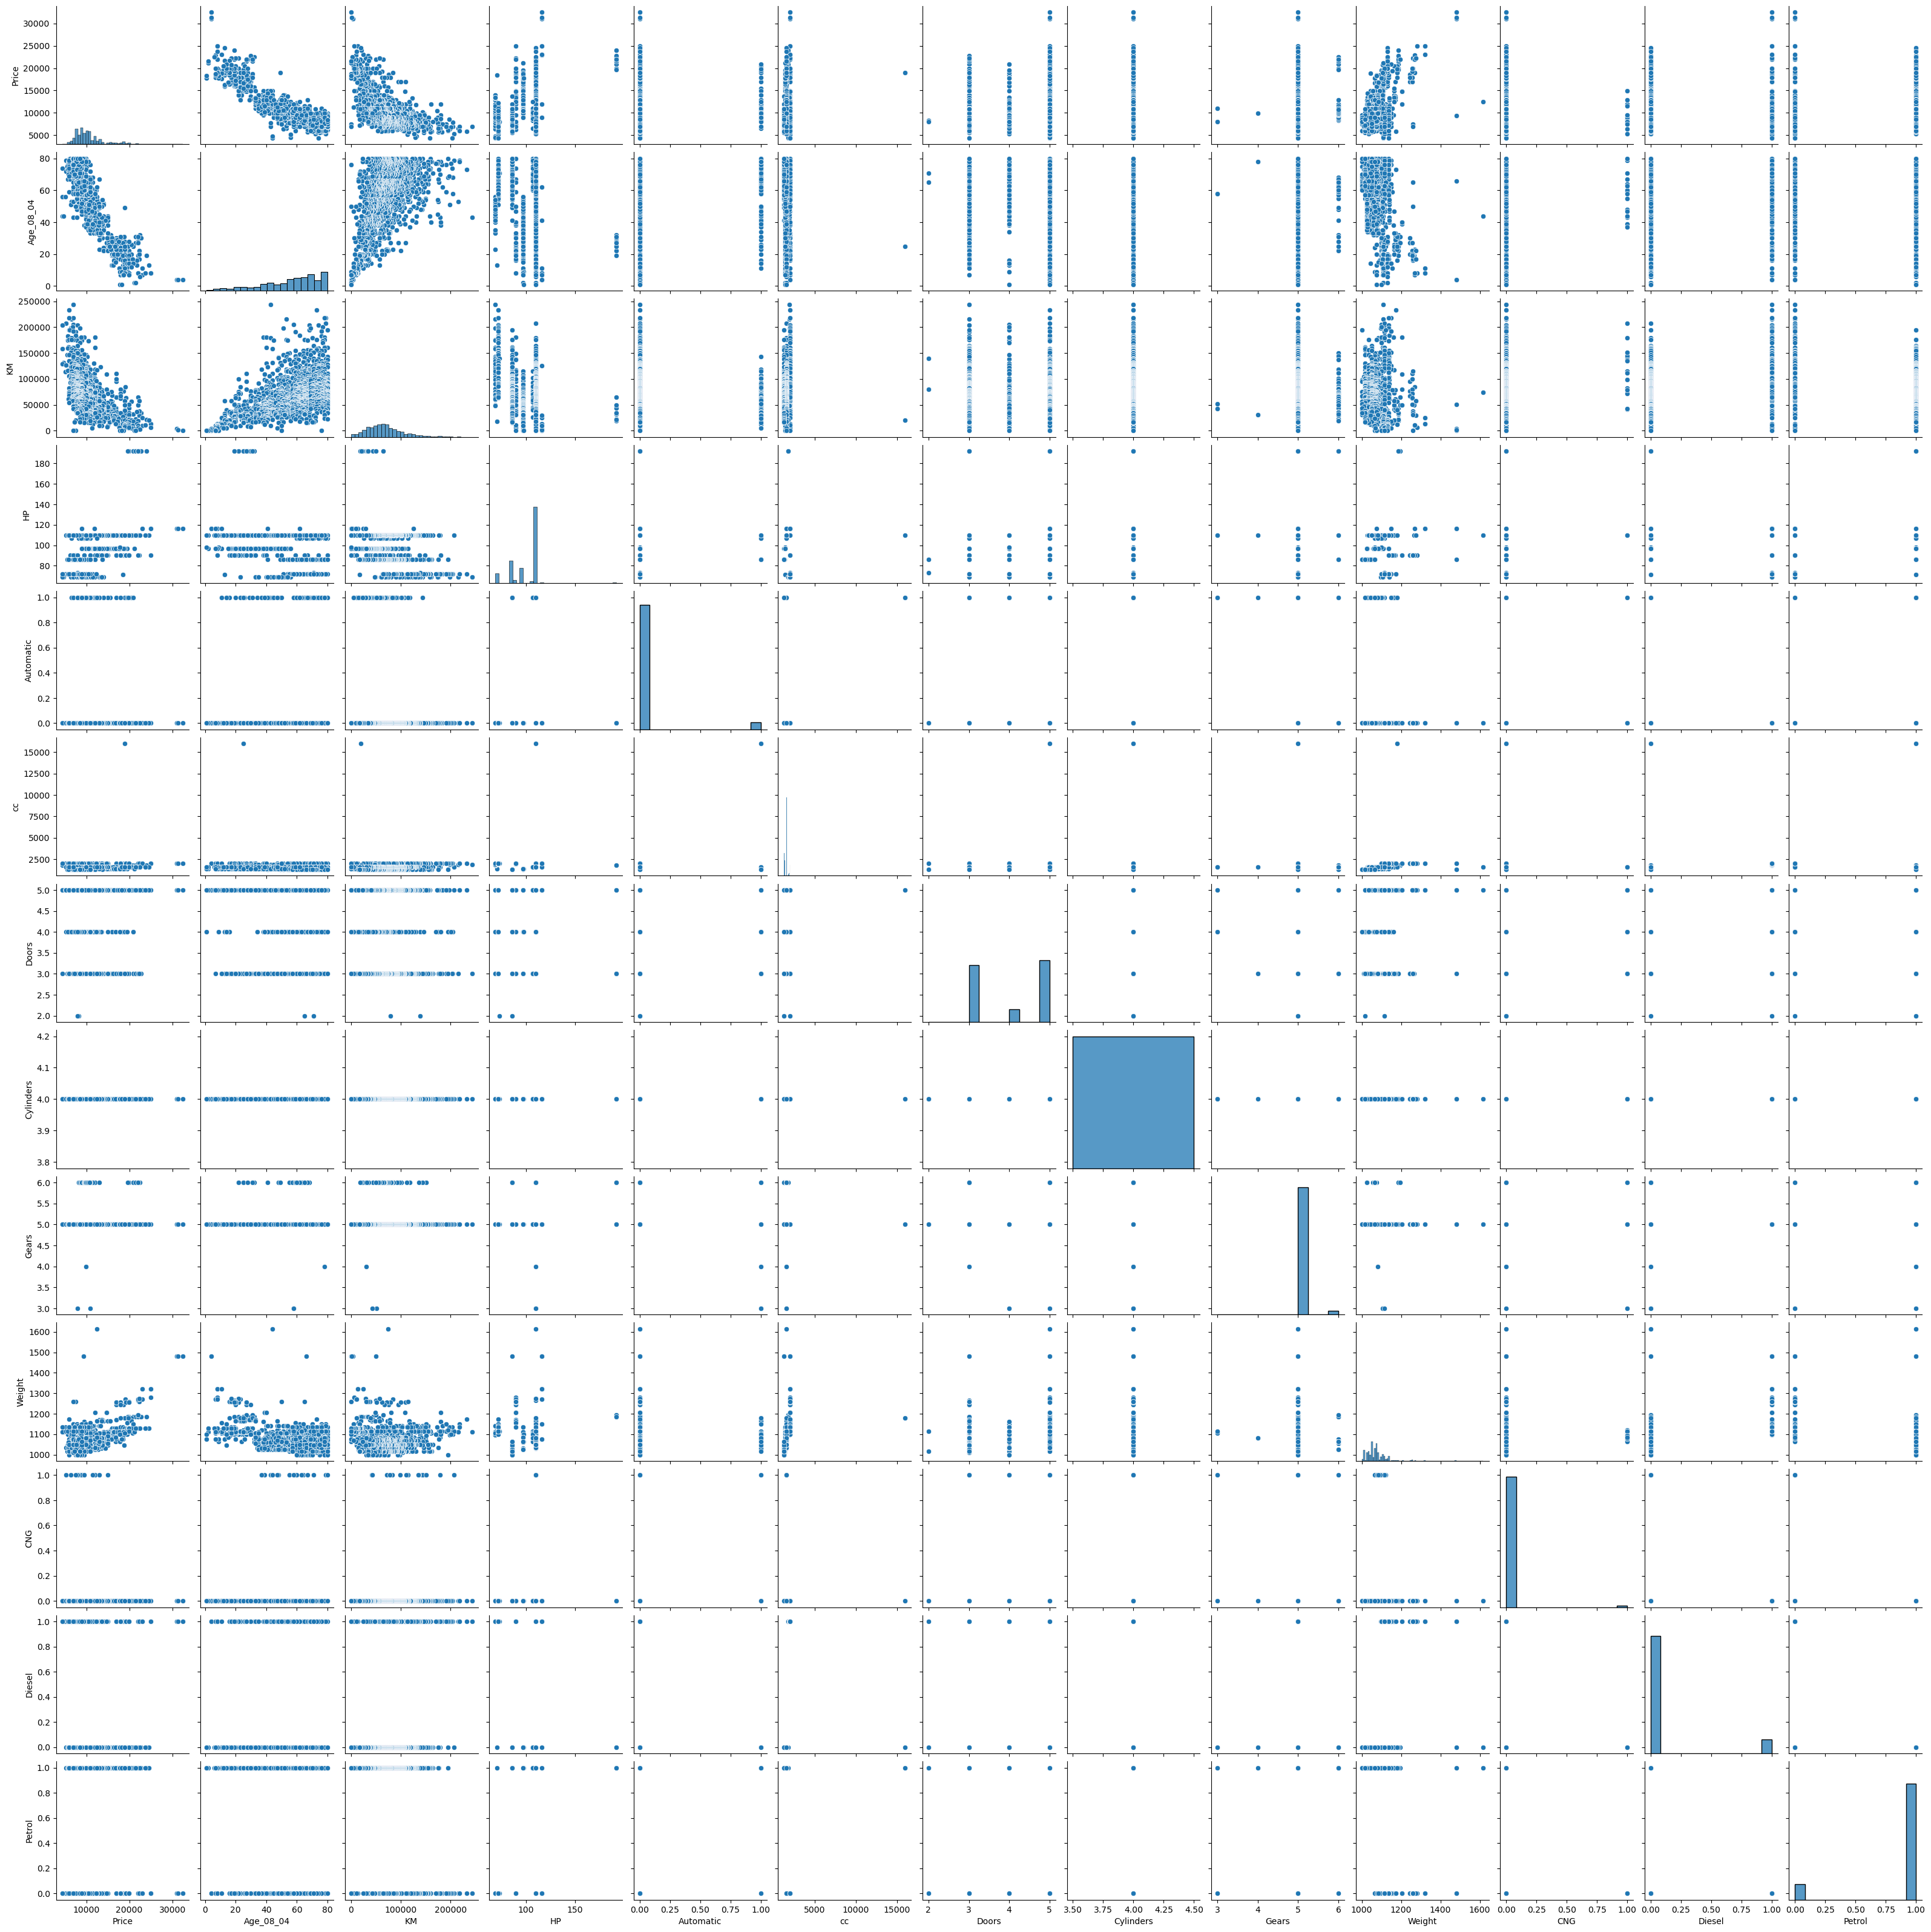

In [184]:
sns.pairplot(df)

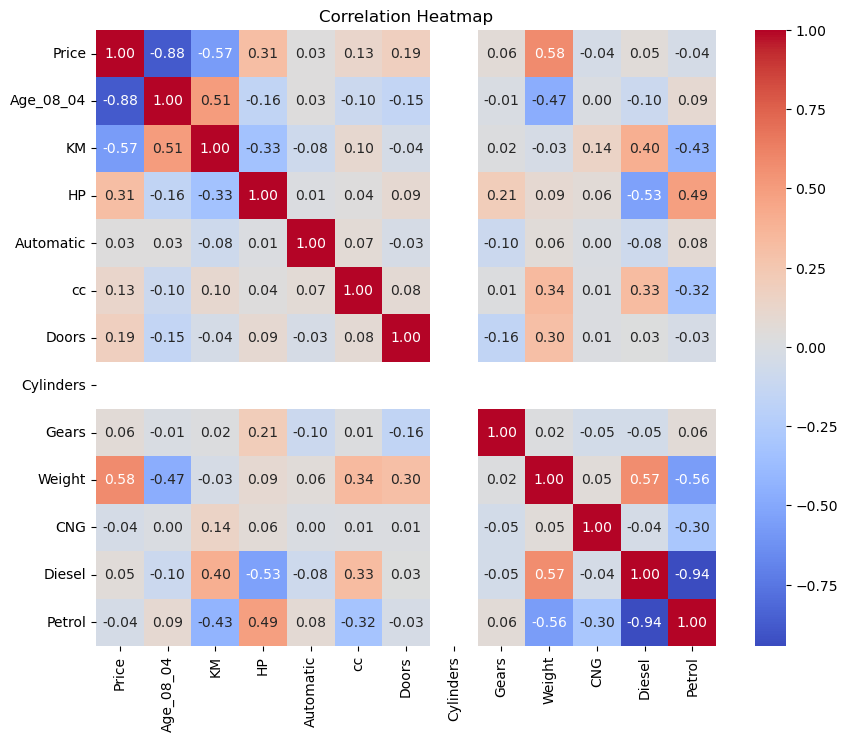

In [185]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Cylinder variable has only single value,\
Hence dropping Cylinder from the dataset.

In [186]:
df.drop(columns=['Cylinders'], inplace=True)
display(df)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,CNG,Diesel,Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


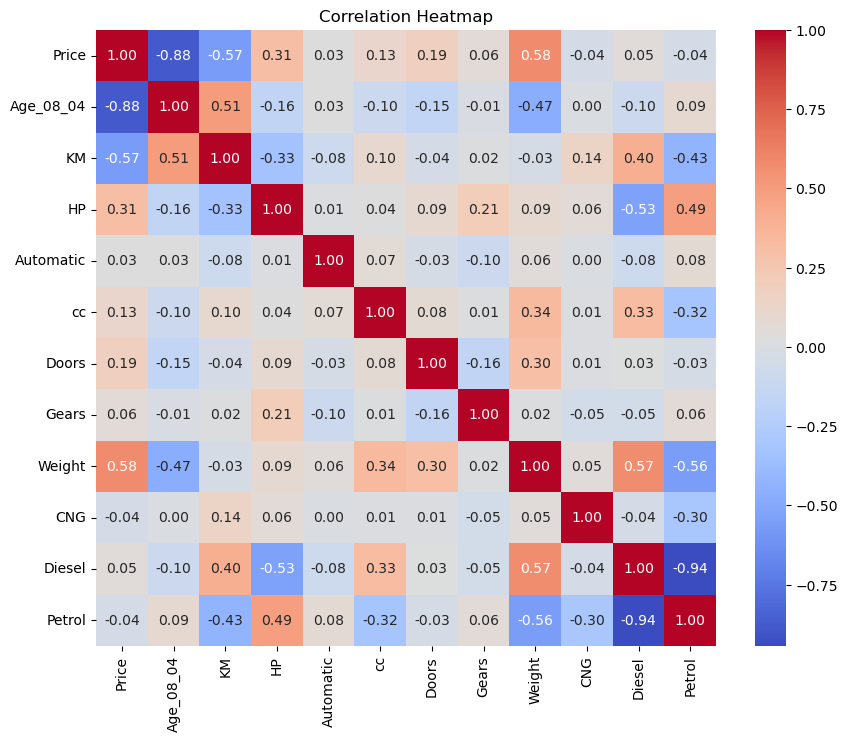

In [187]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [190]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [191]:
# Model 1
model1.fit(X_train, y_train)

LinearRegression()

In [192]:
# Checking for Variance Inflation Factor
# to detect the severity of multicollinearity in the ordianry least square method
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = X.assign(const=1)  # Adding a constant column for intercept
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

# Display VIF values
print("VIF:")
print(vif_series)

VIF:
Age_08_04    1.920520
KM           2.001790
HP           2.299766
Automatic    1.094550
cc           1.223892
Doors        1.217898
Gears        1.117413
Weight       3.297145
CNG               inf
Diesel            inf
Petrol            inf
const        0.000000
dtype: float64


There is high multicollinearity between the dummy variables.\
By excluding one dummy variable, we will ensure that the model is not overparameterized and that there is no perfect multicollinearity among the dummy variables.

In [193]:
# Model 2: Excluding one dummy variable to avoid multicollinearity

X_train_model2 = X_train.drop(columns=['CNG'])
X_test_model2 = X_test.drop(columns=['CNG'])

model2 = LinearRegression()
model2.fit(X_train_model2, y_train)

LinearRegression()

In [194]:
# Standardizing the Variables:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [195]:
# Model 3: Standardized Values

model3 = LinearRegression()
model3.fit(X_train_scaled, y_train)

LinearRegression()

In [196]:
# Using Lasso Method:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [197]:
# Using Ridge Method:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

### 4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [198]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [199]:
# Evaluating Model 1
y_pred_model1 = model1.predict(X_test)
print(f'Model 1: Multiple Linear Regression')
print(f'R2 Score: {r2_score(y_test, y_pred_model1)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_model1))}')

# Evaluating Model 2
y_pred_model2 = model2.predict(X_test_model2)
print("\nModel 2: Multiple Linear Regression (Excluding one dummy variable):")
print("R2 Score:", r2_score(y_test, y_pred_model2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_model2)))

# Evaluating Model 3
y_pred_model3 = model3.predict(X_test_scaled)
print("\nModel 3: Multiple Linear Regression (with scaled features):")
print("R2 Score:", r2_score(y_test, y_pred_model3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_model3)))

# Evaluating Lasso Model
y_pred_lasso = lasso_model.predict(X_test)
print("\nLasso Model: Multiple Linear Regression (with Lasso Method):")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# Evaluating Ridge Model
y_pred_ridge = ridge_model.predict(X_test)
print("\nRidge Model: Multiple Linear Regression (with Ridge Method):")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Model 1: Multiple Linear Regression
R2 Score: 0.8348888040611083
RMSE: 1484.265415329651

Model 2: Multiple Linear Regression (Excluding one dummy variable):
R2 Score: 0.8348888040611083
RMSE: 1484.265415329651

Model 3: Multiple Linear Regression (with scaled features):
R2 Score: 0.8351579006305472
RMSE: 1483.0554016755796

Lasso Model: Multiple Linear Regression (with Lasso Method):
R2 Score: 0.8354626401159695
RMSE: 1481.68392372759

Ridge Model: Multiple Linear Regression (with Ridge Method):
R2 Score: 0.8352480030162176
RMSE: 1482.6500286085047


### Evaluation Results and Conclusion:
1. Model Performance:  

* All models achieved relatively high R2 scores, indicating that they capture a significant portion of the variance in the target variable. 
* Additionally, the RMSE values are relatively low, suggesting that the models make predictions with reasonable accuracy. 
* This indicates that thte models are effective in explaining and predicting the price of cars based on the provided features.

2. Feature Selection:

* The fact that Model 2, which excluded one dummy variable, performed similarly to Model 1 suggests that the excluded dummy variable may not have significantly contributed to the model's predictive power. 
* This implies that feature selection techniques such as excluding redundant variables can simplify the model without sacrificing performance.

3. Feature Scaling:

* Scaling the features using standard scaling (Model 3) led to a slight improvement in model performance.
* This highlights the importance of feature scaling, especially when dealing with algorithms sensitive to feature magnitudes, such as gradient-based optimization algorithms used in linear regression.

4. Regularization:

* Both Lasso and Ridge regularization techniques (Models 4 and 5) improved the model's performance slightly compared to thenon-regularized models. 
* This suggests that incorporating regularization techniques can help prevent overfitting and improve the model's generalization ability, particularly in situations where multicollinearity might be present.

5. Model Selection:

* While all models performed similarly, the choice between them may depend on other factors such as interpretability and computational efficiency. 
* Regularized models like Lasso and Ridge provide additional benefits such as feature selection (Lasso) and improved stability (Ridge), which may be desirable depending on the specific requirements of the application.

6. Interpretability vs Performance Trade-off:

* Regularized models may sacrifice some interpretability due to the penalty terms applied to the coefficients. 
* However, in many cases, the slight decrease in interpretability may be outweighed by the improvement in performance and generalization ability.